# Gambler's problem (Dynamic programming)

In [1]:
# Some useful libraries
import numpy as np
import matplotlib.pyplot as plt

## 1. Introduction and Setup

*(Based on Example 4.3 in Sutton & Barto)*

A gambler has the opportunity to make bets on the outcomes of a sequence of coin flips. If the coin comes up heads, he wins as many dollars as he has staked on that flip; if it is tails, he loses his stake.
The coin has a probability of $p_h = 0.4$ of coming up heads.
The player starts with some integer amount of money between $1 and $99.

The game ends when the gambler wins by reaching his goal of $100, or loses by running out of money.
On each flip, the gambler must decide what portion of his capital to stake, a positive integer number of dollars.
The player cannot cash out, he must play until he wins or loses.
Since there is only a total of $100 at the table, the gambler cannot place a bet that would cause him to have more than $100 after a win.
This problem can be formulated as an undiscounted, episodic, finite MDP. 

Identify the state-space, possible actions (per state), and reward/transition probabilities.

State-space: $ s \in S$ with
$$S = \{0, 1, ..., 100\} $$

Possible actions in state $s$: $a \in A(s)$ with
$$A(s) = \{1, ..., \min(s, 100-s)\} $$

Rewards/transition probabilites for the next state $s'$:
$$ p(a+s|s, a) = 0.4 $$
$$ p(a-s|s, a) = 0.6 $$

For the reward, if $s' = 100$, then $r = 1$, else $r = 0$.


Assign the values mentioned in the description to the constants below. (*Sidenote: in Python, there are no constants, but by convention, we use all caps for variables that are not supposed to be changed.*)

In [2]:
# Money goal to reach
MAX_MONEY = 100

# Possible values of probability of the coin coming up heads
P_HEADS =  0.4

# Small number determining the accuracy of policy evaluation's estimation
THETA = 1e-15

# Discount factor (can be 1, since this is an episodic task)
GAMMA = 1

# A list/array of all possible states
STATES = np.arange(MAX_MONEY + 1)

## 2. Policy Evaluation

In this section we evaluate a given policy $\pi$ by computing the state-value function $v_{\pi}$.

Define the policy you want to evaluate as a list/tuple/array `policy` of adequate length, where `policy[s]` is a list/tuple/array of probabilities for each possible actions in state `s`.
Things to be aware of:
- The terminal states might be easier to handle separately at the beginning of your loop
- The first action in other states is to bet `1` dollar, betting `0` is impossible. Be careful about off-by-one errors!

Initialize the value function as an list/tuple/array `values` of adequate length, where `values[s]` is the value of state `s`. Make sure that terminal states have value zero.

In [3]:
# Define a deterministic policy which we convert to a random policy below
det_policy = [min(100, s, MAX_MONEY - s) for s in STATES]

# Start with an empty policy and add an entry for each state
policy = []
for s in STATES:
    # In the terminal states, no actions are possible
    if s == 0 or s == MAX_MONEY:
        policy.append([])
        continue
    
    # Start with all 0 and add 1 to the one action we want to take
    action_probs = [0.0] * min(s, MAX_MONEY - s)
    action_probs[det_policy[s] - 1] = 1

    policy.append(action_probs)

# Initialize all values as 0
values = [0.0] * (MAX_MONEY + 1)

First, we implement a helper function that evaluates an action `a` for a given state `s`, using the current value function `current_values`.

In [4]:
def evalAction(s, a, current_values):
    # If we are already in a terminal state, return 0
    if s == 0 or s == MAX_MONEY:
        return 0
    
    # Check that s+a and s-a are valid states (optional)
    if s + a > MAX_MONEY or s - a < 0:
        raise Exception('Invalid Action')

    # Compute and return the expected reward + value of the next state
    expected_reward = 0
    expected_state_value = 0

    # coin comes up head
    expected_state_value += P_HEADS * current_values[s + a]

    if s + a == MAX_MONEY:
        expected_reward += P_HEADS * 1

    # coin comes up tails
    expected_state_value += (1 - P_HEADS) * current_values[s - a]

    new_value = expected_reward + GAMMA * expected_state_value
    return new_value
    

Implement iterative policy evaluation. You can follow the pseudo-code on page 75 in Sutton & Barto.

In [5]:
# Loop:
    # delta <- 0

    # Loop for each s in S:
        # v <- V(s)

        # V(s) <- sum_a ...
        # (this part might require multiple lines of code)

        # delta <- max(delta, |v - V(s)|)

    # until delta < THETA

In [6]:
while True:
    # Set delta to 0
    delta = 0

    # Update value function for each state
    for s in STATES:
        old_state_value = values[s]

        # Get the action probabilities for the current state
        action_probs = policy[s]
        
        # Compute expected reward and value of the next state
        new_state_value = 0
        for a in range(1, min(s, MAX_MONEY - s) + 1):
            new_state_value += action_probs[a - 1] * evalAction(s, a, values)
        values[s] = new_state_value

        # Update delta
        delta = max(delta, abs(old_state_value - values[s]))

    # Break if the value function converged
    if delta < THETA:
        break

print(values)

[0, 0.002065624776544145, 0.005164061941360755, 0.00922547106779385, 0.012910154853401887, 0.017385398981324258, 0.023063677669484722, 0.027814113056270507, 0.03227538713350472, 0.03768507279536642, 0.04346349745331064, 0.05035446998069337, 0.057659194173711806, 0.0652393748659265, 0.06953528264067632, 0.07443123938879458, 0.08068846783376232, 0.08661104367721985, 0.09421268198841604, 0.10314362491955592, 0.10865874363327675, 0.1159666262063319, 0.12588617495173357, 0.13357997572379918, 0.1441479854342795, 0.16000000000000003, 0.16309843716481648, 0.16774609291204115, 0.17383820660169086, 0.17936523228010284, 0.18607809847198642, 0.1945955165042271, 0.2017211695844058, 0.20841308070025744, 0.2165276091930496, 0.22519524617996606, 0.23553170497104015, 0.2464887912605677, 0.2578590622988899, 0.26430292396101457, 0.27164685908319186, 0.2810327017506435, 0.2899165655158297, 0.30131902298262414, 0.31471543737933394, 0.3229881154499151, 0.3339499393094979, 0.3488292624276004, 0.3603699635856

Plot the value function you computed above.
Depending on your implementation, it might look nicer to ignore the terminal states (`0`, `MAX_MONEY`).

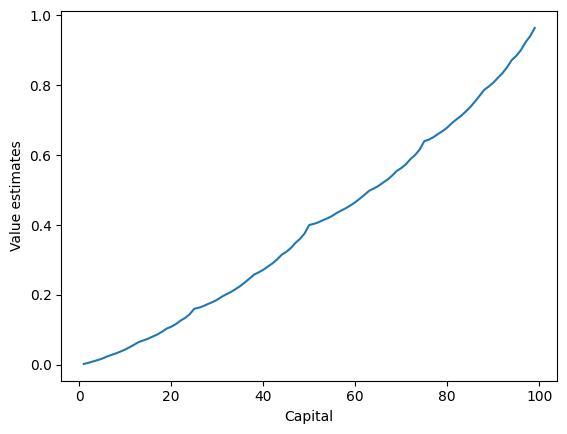

In [7]:
plt.figure()
plt.plot(STATES[1:-1], values[1:-1])
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

Does the value function look as expected?
How does the value function change for different policies, probabilities (`P_HEADS`), and discount factors (`GAMMA`)?

## 3. Policy Iteration

In this section, we compute the optimal policy and value function using policy iteration.
We implement the policy evaluation and improvement steps as individual functions, which we then call alternately for the actual policy iteration.



Implement the policy evaluation step. You can use your code from above, but need to wrap it in a function that takes the current policy as an argument.

In [8]:
def policyEvaluation(policy):
    # Initialize all values as 0
    values = [0.0] * (MAX_MONEY + 1)

    while True:
        # Set delta to 0
        delta = 0

        # Update value function for each state
        for s in STATES:
            old_state_value = values[s]

            # Get the action probabilities for the current state
            action_probs = policy[s]
            
            # Compute expected reward and value of the next state
            new_state_value = 0
            for a in range(1, min(s, MAX_MONEY - s) + 1):
                new_state_value += action_probs[a - 1] * evalAction(s, a, values)
            values[s] = new_state_value

            # Update delta
            delta = max(delta, abs(old_state_value - values[s]))

        # Break if the value function converged
        if delta < THETA:
            break

    return values


Implement the policy improvement step as a function that takes the current value function as an argument and returns the new (greedy) policy.

*Note: In this particular example, there are multiple optimal policies. Your results might look nicer if you break ties (or almost ties) in favor of lower stakes.*

In [9]:
def policyImprovement(values):
    policy = []

    for s in STATES:
        # If we are in a terminal state, no actions are possible
        if s == 0 or s == MAX_MONEY:
            policy.append(tuple())
            continue
        
        # Start with all 0 and add 1 to the best action
        action_probs = [0.0] * min(s, MAX_MONEY - s)

        # Compute the value of each action
        possible_actions = range(1, min(s, MAX_MONEY - s) + 1)
        action_values = [evalAction(s, a, values) for a in possible_actions]

        # Set the index of the best action to 1
        best_action_index = np.argmax(action_values)
        action_probs[best_action_index] = 1

        # Add the action probabilities to the policy
        policy.append(action_probs)

    return policy

Implement policy iteration, using the functions you implemented above.

In [10]:
# Initialize policy

# Use length `MAX_MONEY + 1` to include the terminal state
det_policy = [1 for _ in STATES]

policy = []

for s in STATES:
    if s == 0 or s == MAX_MONEY:
        policy.append([])
        continue
    action_probs = [0.0] * min(s, MAX_MONEY - s)
    action_probs[det_policy[s] - 1] = 1

    policy.append(action_probs)

# Initialize all values to 0
values = np.zeros(MAX_MONEY + 1)

In [11]:
while True:
    # Policy evaluation
    values = policyEvaluation(policy)

    # Policy improvement
    new_policy = policyImprovement(values)

    # Check if policy has changed
    if new_policy == policy:
        break
    
    # Update policy
    policy = new_policy
    

Plot the optimal value function and the optimal policy.

In [12]:
# Convert the random policy representation to a deterministic policy for plotting.
# It would be cleaner to keep placeholders for the terminal states in the policy!
det_policy = [np.argmax(action_probs) + 1 for action_probs in policy[1:-1]]

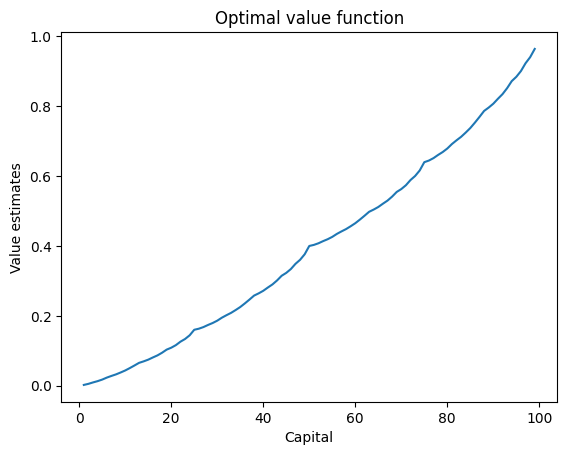

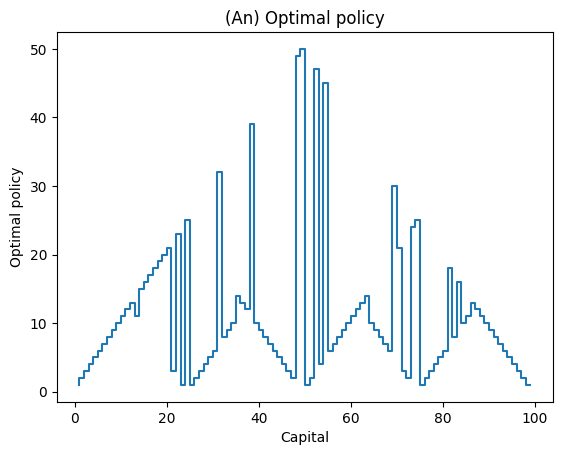

In [13]:
plt.figure()
plt.plot(STATES[1:-1], values[1:-1])
plt.title('Optimal value function')
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.show()

plt.figure()
plt.step(STATES[1:-1], det_policy)
plt.title('(An) Optimal policy')
plt.xlabel('Capital')
plt.ylabel('Optimal policy')
plt.show()

## 4. Value Iteration

In this section we compute the optimal policy and value function using value iteration.
Again, we follow the pseudo-code from Sutton & Barto (p. 83).

In [14]:
# Initialize values

# Loop:
    # delta <- 0

    # Loop for each s in S:
        # v <- V(s)

        # V(s) <- max_a sum_s' ...
        # (this part might require multiple lines of code)

        # delta <- max(delta, |v - V(s)|)

    # until delta < THETA

# Output a deterministic policy such that
# policy[s] = argmax_a ...
# (this part might require another loop over the states/actions)

In [15]:
# Initialize values to zero
values = np.zeros(MAX_MONEY + 1)

# Do value iteration
while True:
    delta = 0
    
    for state in STATES:
        oldValue = values[state]

        # Initialize best value
        newValue = 0

        # Loop for each action
        actions = range(1, min(state, MAX_MONEY - state) + 1)
        for action in actions:
            # Compute the value of the action
            value = evalAction(state, action, values)
            
            # Update newValue if better
            newValue = max(value, newValue)

        # Update value
        values[state] = newValue

        # Update delta
        delta = max(delta, abs(oldValue - newValue))
        
    if delta < THETA:
        break


In [16]:
# Output an optimal deterministic policy
policy = policyImprovement(values)

Plot the optimal value function and the optimal policy.

In [17]:
# Convert the random policy representation to a deterministic policy for plotting.
# It would be cleaner to keep placeholders for the terminal states in the policy!
det_policy = [np.argmax(action_probs) + 1 for action_probs in policy[1:-1]]

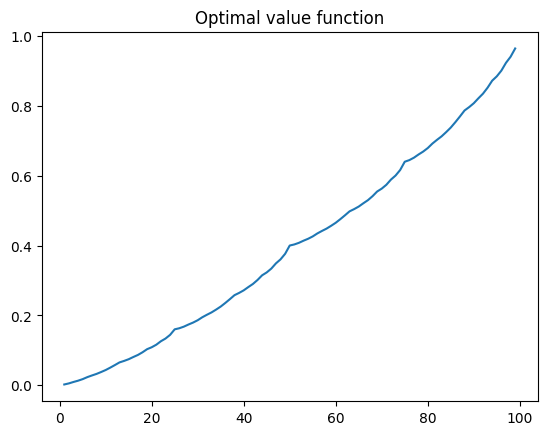

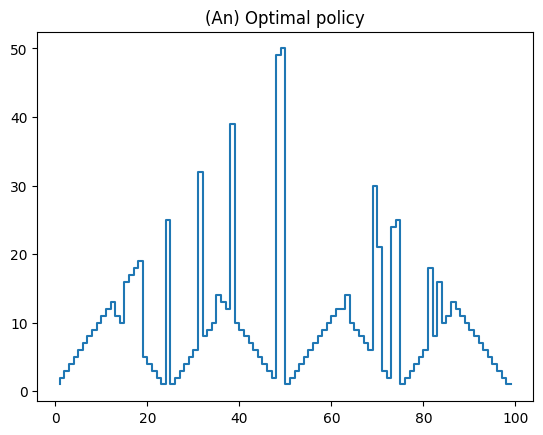

In [18]:
plt.figure()
plt.plot(STATES[1:-1], values[1:-1])
plt.title('Optimal value function')
plt.show()

plt.figure()
plt.step(STATES[1:-1], det_policy)
plt.title('(An) Optimal policy')
plt.show()

### 4.a Bonus

Find and plot *all* optimal policies.

In [19]:
# Tolerance for "equal" values
TOL_OPTIMAL = THETA

# We re-use the optimal value function found above

# Make list of the optimal actions for each state
# (easier to plot)
optimal_actions = []

# Loop for each state
for state in STATES:
    # If we are in a terminal state, do nothing
    if state == 0 or state == MAX_MONEY:
        policy.append([])
        optimal_actions.append([])
        continue

    # Evaluate all actions
    actions = range(1, min(state, MAX_MONEY - state) + 1)
    action_value = [evalAction(state, action, values) for action in actions]
    
    # Find the optimal actions (up to tolerance)
    best_value = np.max(action_value)
    optimal_state_actions = [action for action, value in zip(actions, action_value) if abs(value - best_value) <= TOL_OPTIMAL]
    optimal_actions.append(optimal_state_actions)

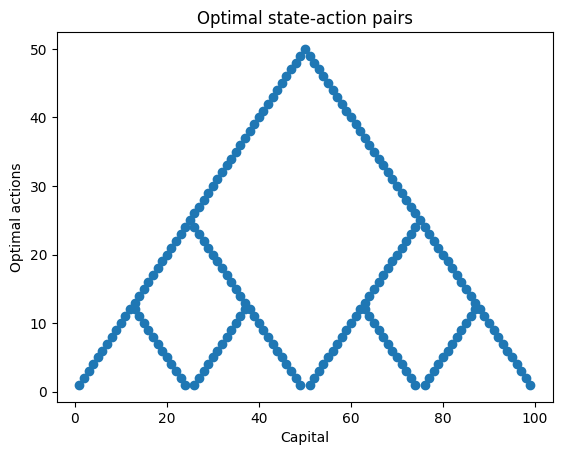

In [20]:
# Create scatter plot with all optimal state/action pairs
x = []
y = []

for state in STATES:
    for action in optimal_actions[state]:
        x.append(state)
        y.append(action)
        
plt.figure()
plt.scatter(x, y)
plt.title('Optimal state-action pairs')
plt.xlabel('Capital')
plt.ylabel('Optimal actions')
plt.show()


### 4.b Bonus 2

Ideas for further exploration:
- How does the set of *all* optimal policies behave for different values of `MAX_MONEY`? *Hint: Powers of 2 are particularly interesting!*
- Change the code above to allow bets which would cause the player to have more than $100 after a win. Does this change the optimal policy?

Mathematical analysis of this problem is surprisingly difficult! See [this paper](https://arxiv.org/abs/2001.00102) for more details.